# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [95]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Start coding here...
print(drug_safety.head())

   age   sex   trx  week  wbc  rbc adverse_effects  num_effects
0   62  male  Drug     0  7.3  5.1              No            0
1   62  male  Drug     1  NaN  NaN              No            0
2   62  male  Drug    12  5.6  5.0              No            0
3   62  male  Drug    16  NaN  NaN              No            0
4   62  male  Drug     2  6.6  5.1              No            0


In [96]:
adv_effects_by_trx = drug_safety.groupby('trx')['adverse_effects'].value_counts()
print(adv_effects_by_trx)

trx      adverse_effects
Drug     No                 9703
         Yes                1024
Placebo  No                 4864
         Yes                 512
Name: adverse_effects, dtype: int64


In [97]:
adv_effect_by_trx_totals = np.array([9703+1024, 4864+512])
print(adv_effect_by_trx_totals)

[10727  5376]


In [98]:
yeses = np.array([1024,512])
print(yeses)

[1024  512]


In [99]:
two_sample_results = proportions_ztest(count = yeses, nobs=adv_effect_by_trx_totals)
print(two_sample_results)

(0.0452182684494942, 0.9639333330262475)


In [100]:
num_effects_groups = pingouin.chi2_independence(data = drug_safety, x = 'num_effects', y = 'trx')
print(num_effects_groups)


(trx                 Drug      Placebo
num_effects                          
0            9703.794883  4863.205117
1             960.587096   481.412904
2              58.621126    29.378874
3               3.996895     2.003105, trx          Drug  Placebo
num_effects               
0            9703     4864
1             956      486
2              63       25
3               5        1,                  test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)


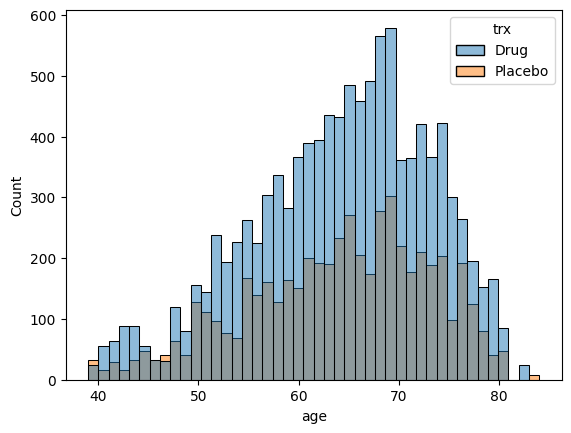

In [101]:
sns.histplot(data = drug_safety, x = 'age', hue = 'trx')
plt.show()

In [102]:
normality_test_age = pingouin.normality(data = drug_safety, dv = 'age', group='trx', method = 'shapiro', alpha=0.05)
print(normality_test_age)

                W          pval  normal
trx                                    
Drug     0.976785  2.189152e-38   False
Placebo  0.975595  2.224950e-29   False


In [103]:
age_trx = drug_safety.loc[drug_safety['trx'] == 'Drug', 'age']
age_placebo = drug_safety.loc[drug_safety['trx'] == 'Placebo', 'age']

In [104]:
alpha = 0.05

In [105]:
age_group_effects = pingouin.mwu(x = age_trx, y = age_placebo, alternative='two-sided')
print(age_group_effects)

          U-val alternative     p-val      RBC      CLES
MWU  29149339.5   two-sided  0.256963 -0.01093  0.505465


In [106]:
age_group_effects['p-val'] < alpha

MWU    False
Name: p-val, dtype: bool

Conclusion: There is no significant difference between the ages of the Drug and Placebo groups as shown by the Mann-Whitney U test.